<a href="https://colab.research.google.com/github/Kostia2004/DLScompetition/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/ML\ Kaggle/advanced-dls-spring-2021.zip

Archive:  /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/ML Kaggle/advanced-dls-spring-2021.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [4]:
dataset = pd.read_csv('train.csv')
dataset

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [10]:
for column in dataset.columns:
  print(column, dataset.loc[:, column].unique())

ClientPeriod [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent ['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 

In [ ]:
def normalyze(dataset):
  dataset = dataset.drop(dataset[dataset['TotalSpent'].isin([' '])].index, axis=0)
  dataset = dataset.replace('No internet service', 'No')
  dataset = dataset.replace('No phone service', 'No')
  dataset['Sex'] = pd.factorize(dataset['Sex'])[0]
  dataset['HasPartner'] = pd.factorize(dataset['HasPartner'])[0]
  dataset['HasChild'] = pd.factorize(dataset['HasChild'])[0]
  dataset['HasPhoneService'] = pd.factorize(dataset['HasPhoneService'])[0]
  dataset['HasMultiplePhoneNumbers'] = pd.factorize(dataset['HasMultiplePhoneNumbers'])[0]
  dataset['HasInternetService'] = pd.factorize(dataset['HasInternetService'])[0]
  dataset['HasOnlineSecurityService'] = pd.factorize(dataset['HasOnlineSecurityService'])[0]
  dataset['HasOnlineBackup'] = pd.factorize(dataset['HasOnlineBackup'])[0]
  dataset['HasDeviceProtection'] = pd.factorize(dataset['HasDeviceProtection'])[0]
  dataset['HasTechSupportAccess'] = pd.factorize(dataset['HasTechSupportAccess'])[0]
  dataset['HasOnlineTV'] = pd.factorize(dataset['HasOnlineTV'])[0]
  dataset['HasMovieSubscription'] = pd.factorize(dataset['HasMovieSubscription'])[0]
  dataset['HasContractPhone'] = pd.factorize(dataset['HasContractPhone'])[0]
  dataset['IsBillingPaperless'] = pd.factorize(dataset['IsBillingPaperless'])[0]
  dataset['PaymentMethod'] = pd.factorize(dataset['PaymentMethod'])[0]
  return dataset

In [ ]:
dataset = normalyze(dataset)
dataset

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,72,25.85,1872.2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,75.90,75.9,0,0,1,1,0,0,1,0,0,0,1,0,0,2,1,2,1
3,32,79.30,2570,1,1,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0
4,60,115.25,6758.45,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,1,0,2,0,0,0,1,0,0,2,0,2,0
5278,50,44.45,2188.45,0,0,0,1,1,0,2,1,0,0,1,1,0,0,1,3,0
5279,1,55.05,55.05,0,0,1,1,0,0,2,0,0,1,1,0,0,2,0,0,0
5280,29,76.00,2215.25,1,0,1,1,0,1,1,0,0,0,0,0,0,2,1,1,0


In [ ]:
X_columns = dataset.columns[:-1]
Y_columns = ['Churn']

In [ ]:
x = dataset[X_columns]
y = dataset[Y_columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=17)

In [ ]:
metrics_scores = {}
metrics = ['accuracy', 'roc_auc', 'precision', 'recall']

#Tree

##Train tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree.get_depth()

29

###Tree parameters setup

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
tree_params = {'max_depth': range(1,20),
'max_features': range(2,19)}

In [ ]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [ ]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 323 candidates, totalling 1615 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(2, 19)},
             verbose=True)

In [ ]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 6, 'max_features': 8}, 0.7887638933396299)

##Test tree classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics_scores['tree'] = {}

tree_pred = tree.predict(x_test)
tree_metrics = []
tree_metrics.append(accuracy_score(y_test, tree_pred))
tree_metrics.append(roc_auc_score(y_test, tree_pred))
tree_metrics.append(precision_score(y_test, tree_pred))
tree_metrics.append(recall_score(y_test, tree_pred))
for i in range(len(metrics)):
  metrics_scores['tree'][metrics[i]] = tree_metrics[i]
for metric in metrics:
  print(metric+':', metrics_scores['tree'][metric])

accuracy: 0.7317535545023697
roc_auc: 0.6476964702867338
precision: 0.44565217391304346
recall: 0.48616600790513836


In [ ]:
metrics_scores['treegrid'] = {}

treegrid_pred = tree_grid.predict(x_test)
treegrid_metrics = []
treegrid_metrics.append(accuracy_score(y_test, treegrid_pred))
treegrid_metrics.append(roc_auc_score(y_test, treegrid_pred))
treegrid_metrics.append(precision_score(y_test, treegrid_pred))
treegrid_metrics.append(recall_score(y_test, treegrid_pred))
for i in range(len(metrics)):
  metrics_scores['treegrid'][metrics[i]] = treegrid_metrics[i]
for metric in metrics:
  print(metric+':', metrics_scores['treegrid'][metric])

accuracy: 0.8037914691943128
roc_auc: 0.7126649778715267
precision: 0.6017699115044248
recall: 0.5375494071146245


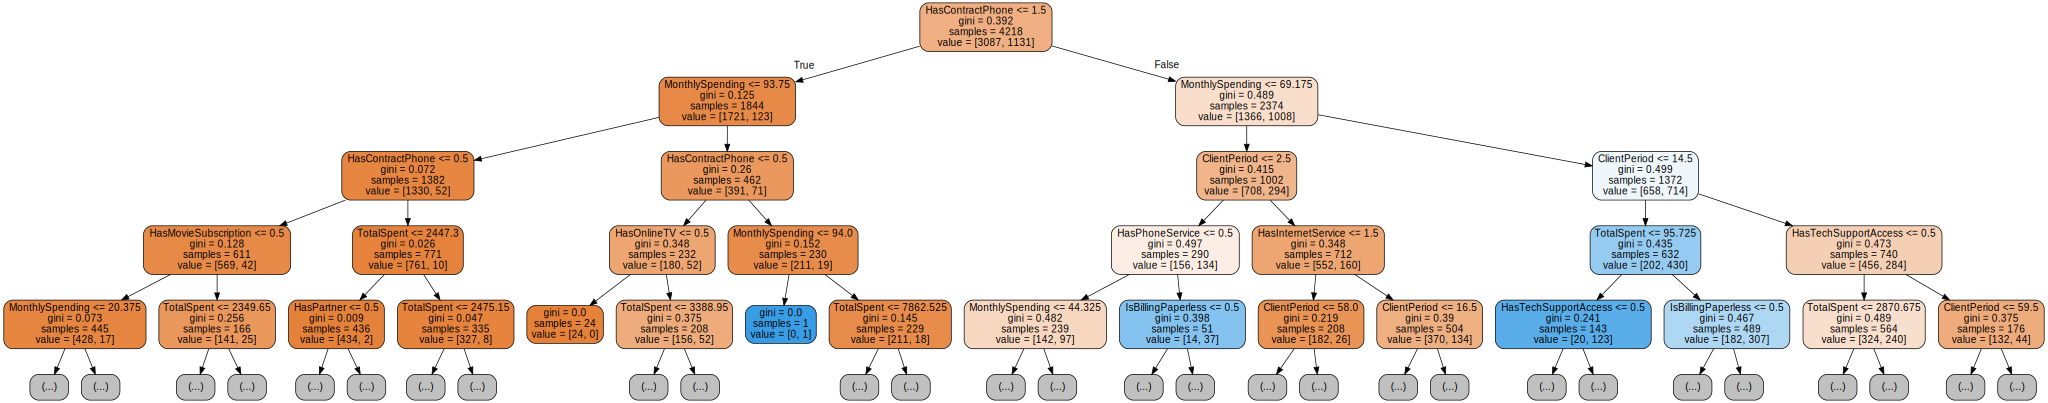

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graph = export_graphviz(tree,
                        feature_names=X_columns,
                        max_depth = 4,
                        filled=True,
                        rounded=True)
graphviz.Source(graph)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier()
RFclf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

##Test random forest classifer

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics_scores['randforest'] = {}

rf_pred = RFclf.predict(x_test)
rf_metrics = []
rf_metrics.append(accuracy_score(y_test, rf_pred))
rf_metrics.append(roc_auc_score(y_test, rf_pred))
rf_metrics.append(precision_score(y_test, rf_pred))
rf_metrics.append(recall_score(y_test, rf_pred))
for i in range(len(metrics)):
  metrics_scores['randforest'][metrics[i]] = rf_metrics[i]
for metric in metrics:
  print(metric+':', metrics_scores['randforest'][metric])

accuracy: 0.7990521327014218
roc_auc: 0.6811380639310814
precision: 0.6084656084656085
recall: 0.45454545454545453


#Logistic Regression

##Train logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

LRclf = LogisticRegression()
LRclf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##Test logistic regression classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics_scores['logregress'] = {}

lr_pred = LRclf.predict(x_test)
lr_metrics = []
lr_metrics.append(accuracy_score(y_test, lr_pred))
lr_metrics.append(roc_auc_score(y_test, lr_pred))
lr_metrics.append(precision_score(y_test, lr_pred))
lr_metrics.append(recall_score(y_test, lr_pred))
for i in range(len(metrics)):
  metrics_scores['logregress'][metrics[i]] = lr_metrics[i]
for metric in metrics:
  print(metric+':', metrics_scores['logregress'][metric])

accuracy: 0.8180094786729858
roc_auc: 0.7247222851961006
precision: 0.641860465116279
recall: 0.5454545454545454


#Gradient boosting classifier

##Train gradient boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

##Test gradient boosting classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics_scores['gradboost'] = {}

gb_pred = gb_clf.predict(x_test)
gb_metrics = []
gb_metrics.append(accuracy_score(y_test, gb_pred))
gb_metrics.append(roc_auc_score(y_test, gb_pred))
gb_metrics.append(precision_score(y_test, gb_pred))
gb_metrics.append(recall_score(y_test, gb_pred))
for i in range(len(metrics)):
  metrics_scores['gradboost'][metrics[i]] = gb_metrics[i]
for metric in metrics:
  print(metric+':', metrics_scores['gradboost'][metric])

accuracy: 0.8180094786729858
roc_auc: 0.707135323745971
precision: 0.6613756613756614
recall: 0.49407114624505927


In [ ]:
metrics_scores

{'gradboost': {'accuracy': 0.8180094786729858,
  'precision': 0.6613756613756614,
  'recall': 0.49407114624505927,
  'roc_auc': 0.707135323745971},
 'logregress': {'accuracy': 0.8180094786729858,
  'precision': 0.641860465116279,
  'recall': 0.5454545454545454,
  'roc_auc': 0.7247222851961006},
 'randforest': {'accuracy': 0.7990521327014218,
  'precision': 0.6084656084656085,
  'recall': 0.45454545454545453,
  'roc_auc': 0.6811380639310814},
 'tree': {'accuracy': 0.7317535545023697,
  'precision': 0.44565217391304346,
  'recall': 0.48616600790513836,
  'roc_auc': 0.6476964702867338},
 'treegrid': {'accuracy': 0.8037914691943128,
  'precision': 0.6017699115044248,
  'recall': 0.5375494071146245,
  'roc_auc': 0.7126649778715267}}

#ALL MODELS

[0.7317535545023697, 0.8037914691943128, 0.7990521327014218, 0.8180094786729858, 0.8180094786729858]
dict_keys(['tree', 'treegrid', 'randforest', 'logregress', 'gradboost'])
[0.6476964702867338, 0.7126649778715267, 0.6811380639310814, 0.7247222851961006, 0.707135323745971]
dict_keys(['tree', 'treegrid', 'randforest', 'logregress', 'gradboost'])
[0.44565217391304346, 0.6017699115044248, 0.6084656084656085, 0.641860465116279, 0.6613756613756614]
dict_keys(['tree', 'treegrid', 'randforest', 'logregress', 'gradboost'])
[0.48616600790513836, 0.5375494071146245, 0.45454545454545453, 0.5454545454545454, 0.49407114624505927]
dict_keys(['tree', 'treegrid', 'randforest', 'logregress', 'gradboost'])


<function matplotlib.pyplot.show>

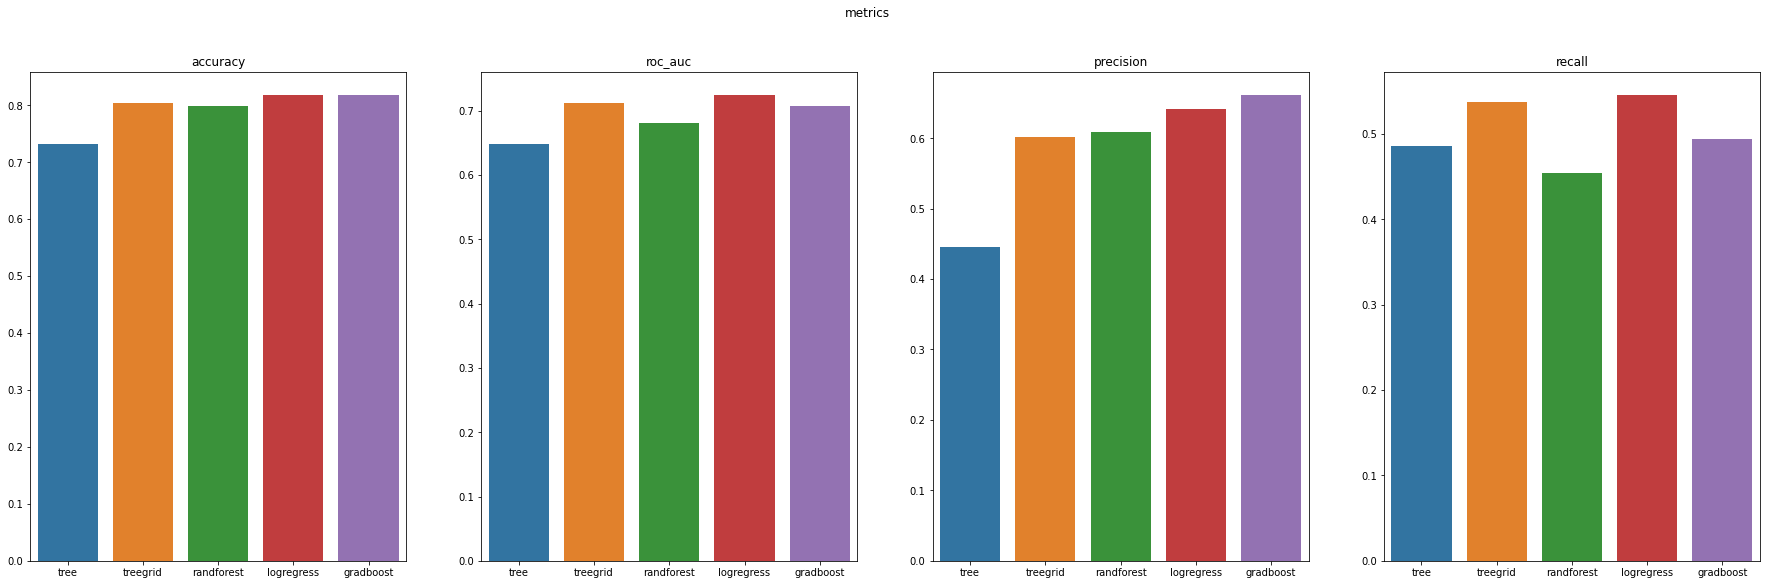

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (31, 9))
ind = 0
for metric in metrics:
  score = []
  for model in metrics_scores.keys():
    score.append(metrics_scores[model][metric])
  print(score)
  print(metrics_scores.keys())
  ax = sns.barplot(x = list(metrics_scores.keys()), y=score, ax = axs[ind])
  ax.title.set_text(metric)
  ind+=1
plt.show
#sns.histplot(data=metrics, x = 'roc', ax = axs[1])
#sns.histplot(data=metrics, x = 'precision', ax = axs[2])
plt.suptitle('metrics')
plt.show